Absolutely! Creating embeddings for groups of time series is a powerful technique, especially useful for tasks like clustering similar time series or as input features for downstream machine learning tasks. Here are a few approaches you can use:

**Concatenated Word2Vec Embeddings:**

Apply the Word2Vec approach to each time series individually
Concatenate the embeddings of all time series in the group

**LSTM Encoder:**

Use an LSTM to process each time series
Take the final hidden state as the embedding for each series
Combine these embeddings (e.g., by concatenation or averaging)


**Transformer-based Embeddings:**

Use a transformer encoder to process the group of time series
Take the output of the [CLS] token or average the outputs as the embedding

In [1]:
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset

# Set random seed for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Generate sample data
n_series = 5
n_timesteps = 100
n_features = 1

# Create a group of time series
group_series = np.random.randn(n_series, n_timesteps, n_features)

# Convert to PyTorch tensors
group_series_tensor = torch.FloatTensor(group_series)


In [2]:
# Define the LSTM Encoder model
class LSTMEncoder(nn.Module):
    def __init__(self, n_features, latent_dim):
        super(LSTMEncoder, self).__init__()
        self.lstm = nn.LSTM(n_features, latent_dim, batch_first=True)
        
    def forward(self, x):
        _, (hidden, _) = self.lstm(x)
        return hidden.squeeze(0)

# Set hyperparameters
latent_dim = 10
learning_rate = 0.001
n_epochs = 100

# Create and initialize the model
encoder = LSTMEncoder(n_features, latent_dim)

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(encoder.parameters(), lr=learning_rate)

# Create DataLoader
dataset = TensorDataset(group_series_tensor)
dataloader = DataLoader(dataset, batch_size=1, shuffle=True)


In [3]:
# Training loop (optional, for demonstration)
for epoch in range(n_epochs):
    for batch in dataloader:
        series = batch[0]
        optimizer.zero_grad()
        output = encoder(series)
        loss = criterion(output, torch.zeros_like(output))  # Example loss
        loss.backward()
        optimizer.step()

# Generate embeddings for each time series in the group
encoder.eval()  # Set the model to evaluation mode
with torch.no_grad():
    embeddings = [encoder(series.unsqueeze(0)).numpy() for series in group_series_tensor]

# Combine embeddings (in this case, by concatenation)
group_embedding = np.concatenate(embeddings)

print("Shape of group embedding:", group_embedding.shape)
print("Group embedding:", group_embedding)

Shape of group embedding: (5, 10)
Group embedding: [[ 1.2562681e-03 -7.9355453e-04  1.7090053e-03 -1.5341504e-03
   6.2765009e-03  6.4757494e-03 -1.4299442e-02  1.9863159e-03
   3.0158856e-04  7.1015093e-03]
 [ 1.5843629e-03 -6.5982487e-04  3.5073718e-03 -3.3187903e-03
   1.7731959e-02  7.2393212e-03 -6.1974727e-04  6.3421908e-03
   1.7156804e-03  2.3287013e-02]
 [-4.7254801e-04 -6.6043215e-04 -1.3005142e-03  3.6442592e-03
  -1.0619276e-02  3.0924683e-03 -3.0674346e-02 -1.3527460e-02
   3.1245332e-03 -1.3727801e-02]
 [-7.3870999e-04  6.2368716e-05 -3.3817124e-03  2.5614039e-03
  -1.3819893e-02  1.7172651e-03 -3.0151829e-02 -1.2162690e-02
  -2.1357345e-03 -1.5720736e-02]
 [ 1.6816880e-03  6.7363511e-04  3.6568430e-03 -5.3259265e-03
   2.4218395e-02  7.9304883e-03  7.9869274e-03  1.0170114e-02
   1.0821288e-03  3.2406081e-02]]


In [4]:
# Optional: Reduce dimensionality of the group embedding
from sklearn.decomposition import PCA

pca = PCA(n_components=5)
reduced_embedding = pca.fit_transform(group_embedding)

print("Shape of reduced group embedding:", reduced_embedding.shape)
print("Reduced group embedding:", reduced_embedding)

Shape of reduced group embedding: (5, 5)
Reduced group embedding: [[ 1.9502813e-03 -7.7499036e-04  3.7339933e-03  1.7484542e-04
  -7.5830459e-10]
 [ 2.6271600e-02  9.1560296e-04  5.8978152e-05 -5.6155282e-04
  -7.5830120e-10]
 [-3.3386372e-02  3.5533283e-03 -6.2750967e-04  1.3170579e-04
  -7.5830320e-10]
 [-3.5742756e-02 -3.2250329e-03 -1.3008288e-03 -1.0929863e-04
  -7.5830220e-10]
 [ 4.0907253e-02 -4.6890805e-04 -1.8646385e-03  3.6429820e-04
  -7.5830364e-10]]


### This PyTorch implementation does the following:

Generates the same group of 5 random time series, each with 100 time steps and 1 feature.
Defines an LSTMEncoder class using PyTorch's nn.Module.
Sets up the model, loss function, and optimizer.
Includes a training loop (which is optional and uses a dummy loss function for demonstration).
Generates embeddings for each time series in the group using the trained encoder.
Concatenates the individual embeddings to create a group embedding.
Optionally reduces the dimensionality of the group embedding using PCA.

### Key differences from the TensorFlow version:

We use PyTorch's nn.Module to define the model structure.
The forward pass is defined in the forward method of the LSTMEncoder class.
We use PyTorch's DataLoader for batch processing (even though we're using batch size 1 in this example).
The training loop is more explicit in PyTorch, whereas in TensorFlow/Keras it's often abstracted away in the fit method.
We use torch.no_grad() when generating embeddings to disable gradient computation.

**You can adapt this approach based on your specific needs:**

If your time series have different lengths, you might need to pad or truncate them.
You can experiment with different architectures (e.g., bidirectional LSTM, GRU, or transformers) for potentially better embeddings.
The way you combine individual embeddings (concatenation, averaging, etc.) can be chosen based on your specific use case.
You might want to add a fine-tuning step if you have a specific downstream task in mind.

This group embedding can then be used for tasks like clustering similar groups of time series, as input features for a classifier, or for visualization purposes.

# Example 2

This PyTorch implementation follows the same structure as the TensorFlow/Keras version, with a few key differences:

We define a custom LSTMAutoencoder class that inherits from nn.Module. This class encapsulates both the encoder and decoder LSTMs.
The forward method defines how data flows through the model. It first encodes the input, then uses the encoded representation to initialize the decoder.
We use PyTorch's DataLoader to handle batching and shuffling of the data.
The training loop is more explicit in PyTorch, where we manually iterate over epochs and batches.
We define a separate function generate_embeddings to extract the encoded representations, which is equivalent to using the encoder part of the model.

Key points to note:

The batch_first=True argument in the LSTM constructors means that our input tensors should have shape (batch_size, sequence_length, input_size).
We use model.eval() and torch.no_grad() when generating embeddings to ensure we're not in training mode and not computing gradients.
This implementation assumes your data is already a PyTorch tensor. If it's not, you'll need to convert it (e.g., X = torch.tensor(X, dtype=torch.float32)).

To use these embeddings as input for another model, you would typically:

Generate embeddings for all your data using the generate_embeddings function.
Use these embeddings as features for your next model, which could be a classifier, regressor, or any other type of model depending on your task.

In [32]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Generate mock time series data
def generate_mock_data(num_samples, seq_length, num_features):
    data = []
    for _ in range(num_samples//2):
        # Generate a simple sine wave with some noise
        t = np.linspace(0, 10, seq_length)
        base_wave = np.sin(t)
        waves = []
        for _ in range(num_features):
            wave = base_wave + np.random.normal(0, 0.1, seq_length)
            waves.append(wave)
        data.append(np.column_stack(waves))

    for _ in range(num_samples//2):
        # Generate a simple sine wave with some noise
        t = np.linspace(0, 10, seq_length)
        base_wave = 2.0 * np.cos(t)
        waves = []
        for _ in range(num_features):
            wave = base_wave + np.random.normal(0, 0.1, seq_length)
            waves.append(wave)
        data.append(np.column_stack(waves))
        
    return np.array(data)

# LSTM Autoencoder model
class LSTMAutoencoder(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(LSTMAutoencoder, self).__init__()
        self.hidden_size = hidden_size

        # for both these models, num_layers is by default set to 1.
        self.encoder = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.decoder = nn.LSTM(hidden_size, input_size, batch_first=True)

    def forward(self, x):
        # Encode
        # x is of shape [32, 10, 3]
        # 32 - batch size, 10 - sequence length, 3 - num_times_series
        # Running self.encoder
        _, (hidden, _) = self.encoder(x)
        
        # Use the last hidden state as input to the decoder
        decoder_input = hidden[-1].unsqueeze(1).repeat(1, x.size(1), 1)
        
        # Decode
        output, _ = self.decoder(decoder_input)
        return output


In [33]:
# Generate mock data
num_samples = 10000
seq_length = 10
num_features = 3
X = generate_mock_data(num_samples, seq_length, num_features)

X.shape

(10000, 10, 3)

In [69]:
# Convert to PyTorch tensors
X = torch.FloatTensor(X)

# Create DataLoader
dataset = TensorDataset(X)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

# Initialize model, loss function, and optimizer
input_size = num_features
hidden_size = 64
model = LSTMAutoencoder(input_size, hidden_size)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters())

In [71]:
for batch in dataloader:
    inputs = batch[0]
    break

inputs.shape

torch.Size([32, 10, 3])

In [77]:
a, b = model.encoder(inputs)

In [81]:
p, q = b

In [85]:
q.shape

torch.Size([1, 32, 64])

In [42]:
# Training loop
num_epochs = 85
for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    for batch in dataloader:
        inputs = batch[0]
        
        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, inputs)
        
        # Backward pass and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()
    
    avg_loss = total_loss / len(dataloader)
    print(f'Epoch [{epoch+1}/{num_epochs}], Average Loss: {avg_loss:.4f}')

Epoch [1/85], Average Loss: 1.2716
Epoch [2/85], Average Loss: 1.2400
Epoch [3/85], Average Loss: 1.2286
Epoch [4/85], Average Loss: 1.2041
Epoch [5/85], Average Loss: 1.1963
Epoch [6/85], Average Loss: 1.1898
Epoch [7/85], Average Loss: 1.1872
Epoch [8/85], Average Loss: 1.1911
Epoch [9/85], Average Loss: 1.1756
Epoch [10/85], Average Loss: 1.1729
Epoch [11/85], Average Loss: 1.1694
Epoch [12/85], Average Loss: 1.1651
Epoch [13/85], Average Loss: 1.1609
Epoch [14/85], Average Loss: 1.1581
Epoch [15/85], Average Loss: 1.1553
Epoch [16/85], Average Loss: 1.1525
Epoch [17/85], Average Loss: 1.1495
Epoch [18/85], Average Loss: 1.1490
Epoch [19/85], Average Loss: 1.1441
Epoch [20/85], Average Loss: 1.1409
Epoch [21/85], Average Loss: 1.1369
Epoch [22/85], Average Loss: 1.0999
Epoch [23/85], Average Loss: 1.0759
Epoch [24/85], Average Loss: 1.0610
Epoch [25/85], Average Loss: 1.0504
Epoch [26/85], Average Loss: 1.0441
Epoch [27/85], Average Loss: 1.0379
Epoch [28/85], Average Loss: 1.0346
E

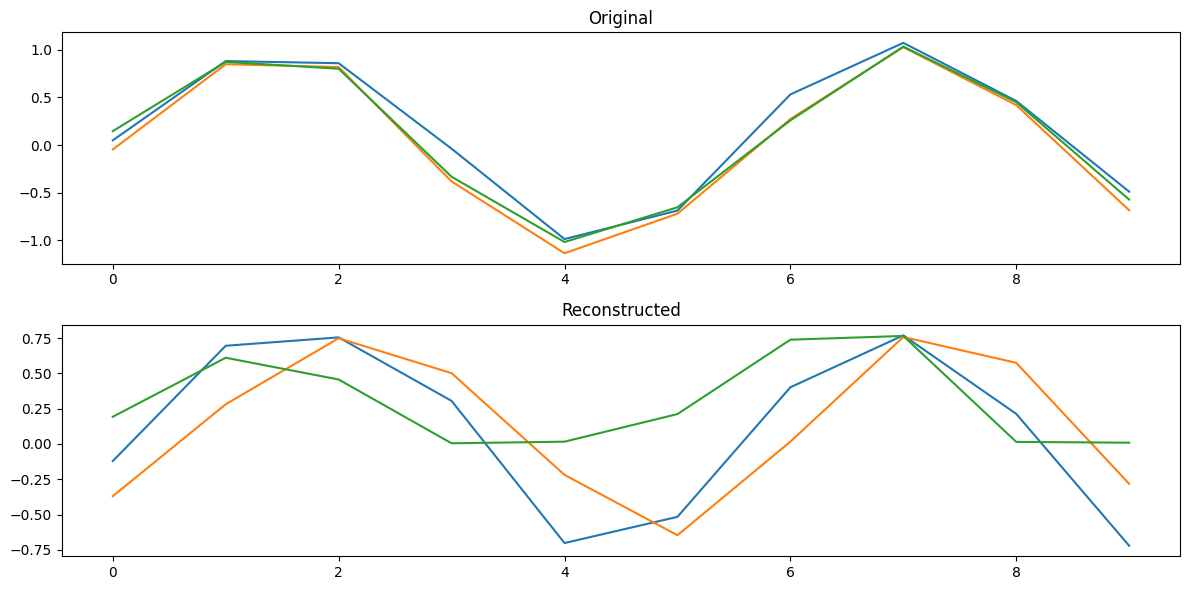

Shape of embeddings: torch.Size([10000, 64])
First few embeddings:
tensor([[ 6.0216e-04, -8.7786e-01, -9.9918e-01,  5.9737e-01,  2.3121e-04,
          9.9706e-01, -7.0029e-01,  1.1717e-03,  6.9507e-01,  4.9920e-01,
         -2.6296e-01, -4.9615e-01, -8.7550e-01, -2.3328e-01, -9.8321e-01,
          3.2355e-02, -9.9840e-01,  9.4958e-01, -5.1981e-03,  9.5105e-01,
         -1.8033e-03,  6.9094e-03, -1.8811e-01, -1.8519e-02,  1.3923e-04,
          9.7921e-01,  5.5684e-01,  9.9378e-01,  1.3510e-01, -6.3154e-01,
          2.3506e-03,  7.7358e-01,  9.8237e-01,  1.1788e-01, -9.7563e-01,
         -8.4590e-01,  9.9811e-01,  1.1281e-01,  7.3779e-04,  1.2934e-01,
          1.7504e-03, -1.3401e-02, -6.5450e-01,  1.1493e-01,  1.7815e-01,
         -6.5666e-01, -4.1406e-04,  1.3053e-02, -9.9546e-01, -9.6194e-02,
          3.4329e-02, -8.9675e-01, -9.5630e-01,  8.8643e-01,  1.1541e-02,
          3.3953e-02,  1.4833e-04,  4.6739e-01, -1.7068e-03, -9.1780e-01,
          9.8363e-01, -1.8160e-03,  5.8530e-0

In [44]:
# Function to generate embeddings
def generate_embeddings(model, data):
    model.eval()
    with torch.no_grad():
        _, (hidden, _) = model.encoder(data)
        return hidden[-1]

# Generate embeddings for the entire dataset
embeddings = generate_embeddings(model, X)

# Visualize original data and reconstruction for a single sample
model.eval()
with torch.no_grad():
    sample_idx = 0
    sample = X[sample_idx:sample_idx+1]
    reconstructed = model(sample)

    plt.figure(figsize=(12, 6))
    plt.subplot(2, 1, 1)
    plt.title("Original")
    plt.plot(sample[0].numpy())
    plt.subplot(2, 1, 2)
    plt.title("Reconstructed")
    plt.plot(reconstructed[0].numpy())
    plt.tight_layout()
    plt.show()

print(f"Shape of embeddings: {embeddings.shape}")
print(f"First few embeddings:\n{embeddings[:5]}")

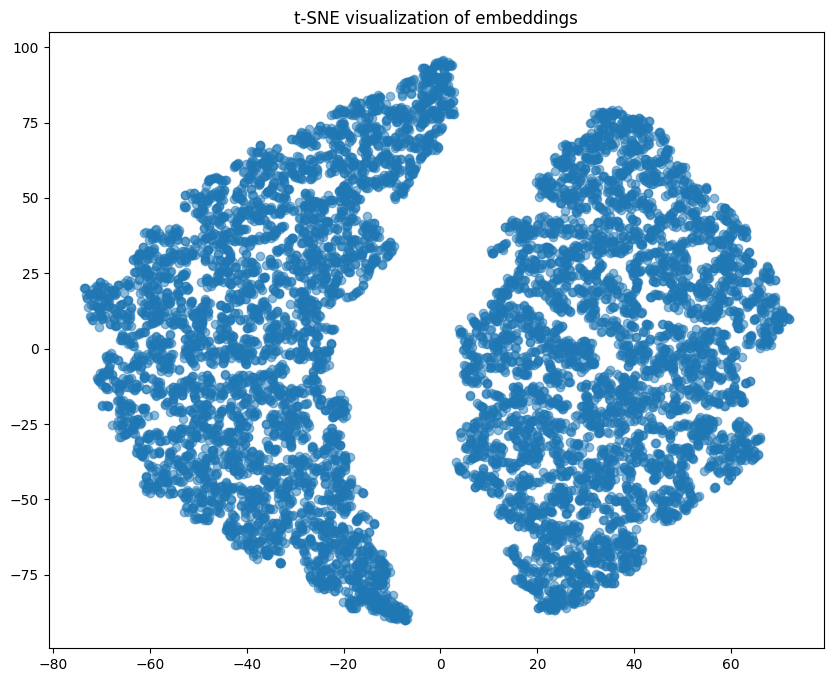

In [45]:
from sklearn.manifold import TSNE

# 2. Visualization with t-SNE
def visualize_embeddings(embeddings, n_components=2):
    tsne = TSNE(n_components=n_components, random_state=42)
    embeddings_2d = tsne.fit_transform(embeddings.numpy())
    
    plt.figure(figsize=(10, 8))
    plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], alpha=0.5)
    plt.title("t-SNE visualization of embeddings")
    plt.show()

visualize_embeddings(embeddings)

# LSTM Autoencoder Embedding Evaluation

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
from scipy.stats import pearsonr

# Assume we have our trained model, original data X, and embeddings from previous example

# 1. Reconstruction Error
def compute_reconstruction_error(model, data):
    model.eval()
    with torch.no_grad():
        reconstructed = model(data)
        mse = nn.MSELoss()(reconstructed, data)
    return mse.item()

reconstruction_error = compute_reconstruction_error(model, X)
print(f"Reconstruction Error: {reconstruction_error}")

# 2. Visualization with t-SNE
def visualize_embeddings(embeddings, n_components=2):
    tsne = TSNE(n_components=n_components, random_state=42)
    embeddings_2d = tsne.fit_transform(embeddings.numpy())
    
    plt.figure(figsize=(10, 8))
    plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], alpha=0.5)
    plt.title("t-SNE visualization of embeddings")
    plt.show()

visualize_embeddings(embeddings)

# 3. Cluster Analysis
def analyze_clusters(embeddings, n_clusters=5):
    from sklearn.cluster import KMeans
    
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(embeddings.numpy())
    
    silhouette_avg = silhouette_score(embeddings.numpy(), cluster_labels)
    print(f"Silhouette Score: {silhouette_avg}")
    
    return cluster_labels

cluster_labels = analyze_clusters(embeddings)

# 4. Similarity Analysis
def compute_similarity(emb1, emb2):
    return torch.nn.functional.cosine_similarity(emb1, emb2, dim=0)

def analyze_similarity(embeddings, X, n_samples=1000):
    similarities = []
    for _ in range(n_samples):
        i, j = np.random.choice(len(embeddings), 2, replace=False)
        sim_emb = compute_similarity(embeddings[i], embeddings[j])
        sim_data = compute_similarity(X[i].flatten(), X[j].flatten())
        similarities.append((sim_emb.item(), sim_data.item()))
    
    similarities = np.array(similarities)
    correlation = pearsonr(similarities[:, 0], similarities[:, 1])[0]
    print(f"Correlation between embedding and data similarities: {correlation}")

    plt.figure(figsize=(8, 6))
    plt.scatter(similarities[:, 0], similarities[:, 1], alpha=0.5)
    plt.xlabel("Embedding Similarity")
    plt.ylabel("Data Similarity")
    plt.title("Embedding vs Data Similarity")
    plt.show()

analyze_similarity(embeddings, X)

# 5. Interpolation in Latent Space
def interpolate_embeddings(model, emb1, emb2, steps=10):
    interpolated = torch.zeros(steps, *emb1.shape)
    for i in range(steps):
        alpha = i / (steps - 1)
        interpolated[i] = emb1 * (1 - alpha) + emb2 * alpha
    
    model.eval()
    with torch.no_grad():
        decoded = model.decoder(interpolated.unsqueeze(1).repeat(1, X.shape[1], 1))
    
    return decoded

def visualize_interpolation(model, embeddings, X):
    i, j = np.random.choice(len(embeddings), 2, replace=False)
    interpolated = interpolate_embeddings(model, embeddings[i], embeddings[j])
    
    plt.figure(figsize=(12, 8))
    for k in range(0, interpolated.shape[0], 3):
        plt.subplot(4, 3, k // 3 + 1)
        plt.plot(interpolated[k, :, 0].numpy())
        plt.title(f"Step {k}")
    plt.tight_layout()
    plt.show()

visualize_interpolation(model, embeddings, X)

# 6. Correlation Analysis
def analyze_correlations(embeddings, X):
    correlations = []
    for i in range(embeddings.shape[1]):
        for j in range(X.shape[2]):
            correlation = pearsonr(embeddings[:, i].numpy(), X[:, 0, j].numpy())[0]
            correlations.append((i, j, correlation))
    
    correlations.sort(key=lambda x: abs(x[2]), reverse=True)
    print("Top correlations between embedding dimensions and input features:")
    for emb_dim, feat_dim, corr in correlations[:5]:
        print(f"Embedding dim {emb_dim}, Feature dim {feat_dim}: Correlation = {corr:.3f}")

analyze_correlations(embeddings, X)